# TITANIC DISASTER

* *Prelude*:

    The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

    One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


* *About the Project*:

    In this project, we will try to analyze the data of the passengers in the Titanic and try to find out what sorts of people were likely to survive.
    In particular, we will apply the tools of machine learning to predict which passengers survived the tragedy.

## Different in dataset are given below

* PassengerID =column added by kaggle to identify each row and make submission easier
* Survived=whether the passanger survived or not and the value we are predicting(0=No,1=Yes)
* Plcass= class of the ticket passenger purchased (1st class =1, 2nd class =2, 3rd classs= 3)
* Sex= the passenger's sex
* Name =name of the passenger
* SibSp = the number of sibling or spouses passenger had aboard the titanic
* Parch=the number of parents or childern the titianic passenger had aboard the Titanic
* Ticket=ticket number
* Fare=fare of the passenger paid
* Cabin=Passenger's cabin number
* Embarked= The port where the passenger embarked

# 1. THE IMPORT
## import various file
* **Packages Imported** :-

    1. numpy : for numerical computation
    2. pandas: for data manipulation and analysis
    3. matplotlib: plotting library
    4. seaborn: plotting library based on matplotlib
    5. sklearn: machine learning library

In [2]:
import numpy as np
import pandas as pd

## import visual modules

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [4]:
## version of packages used
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
#print(f'Matplotlib version: {plt.__version__}')
print(f'Seaborn version: {sns.__version__}')

Numpy version: 1.12.0
Pandas version: 0.23.4
Seaborn version: 0.9.0


# 2. THE DATA
## load the data

In [5]:
titanic=pd.read_csv("train.csv")

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# To get the information about the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* **The information that we get about data through.info() is:-**
* We get to know that the total number of entries are 891
* There are 12 columns out of which 2 float type 4 string type and 6 int type
    - PassengerId (int):the unique number to each 891 passengers
    - Survived (int):whether the passenger survived the disaster or not. 0 for not survived and 1 for survived
    - Pclass(int): is the class alotted to the passenger in titanic.1 for first class 2 for second class and 3 for thirdclass
    - Name(string): gives the name of the passenger
    - Sex(string): whether the passenger is male or female
    - Age (int): the age of the passenger. contain NaN values. 
    - SibSp(int): the number of sibling or spouse that passenger have which are travelling with him/her
    - Parch (int):the number of parent or children that passenger have which are tarvelling with him/ her
    - Ticket(int): give the ticket number and ticket detail of that passenger
    - Fare(float):gives the cost for that the passenger paid
    - Cabin (string):cabin number of passenger.contain NaN values.
    - Embarked(String): port of embarkation;C = Cherbourg, Q = Queenstown, S = Southampton; contains NaN values.   

In [8]:
#To describe the data 
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* **Summary of Dataframe -- using describe():**
    - PassengerId has unique value from 1 to 891.
    - Survived has value either 0 or 1, mean is 0.38 that means we have more data about passengers who did not surived the crash.
    - Pclass has value either 1 or 2 or 3, mean is 2.3 that means we have a lots of people in passenger class 2.
    - Age has NaN values, min age being 0.4 and max being 80, mean is 29.6 that means we have a lot of people having age around 30.
    - SibSp has min value of 0 and max value of 8, mean is 0.52 that means there are lot of people having no siblings or spouse aboard.
    - Parch has min value 0 and max value 6, mean being 0.38 that means there are lot of people have no parents or children aboard.
    - Fare has min value 0 and max value 512.32, mean being 32.20 that means avg ticket price was 32.20

 **To calculate the total number of NaN value in Age, Cabin and Embarked** 

In [9]:
list_values=["Age","Cabin","Embarked"]
titanic[list_values].isna().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

## To fill the NaN value in the dataset
 
 We will calculate the median age of each Pclass and then fill the NaN value according to its corresponding Pclass.

In [10]:
# to find the median age of each class of passenger
titanic_pclass=titanic.groupby("Pclass")
titanic_pclass["Age"].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [11]:
# to fill NaN of age column
def age(cols):
    pclass=cols[0]
    age=cols[1]
    
    if pd.isnull(age):
        if pclass ==1:
            return 37.0
        elif pclass ==2:
            return 29.0
        else :
            return 24.0
    else:
        return age
titanic["Age"]=titanic[["Pclass","Age"]].apply(age,axis=1)    

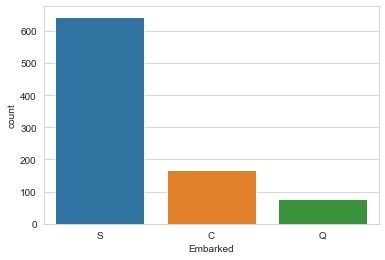

In [12]:
#To show the number of passengers from each embarked
sns.countplot(x="Embarked",data=titanic)

The maxium number of passenger are from the Embarked S

## To fill NaN value in embarked column

In the above plot we have seen that the maximum count is from the S embarked hence we will fill the NaN with the S alphabet

In [13]:
titanic["Embarked"]=titanic["Embarked"].fillna("S")

In [14]:
#To calculate the total fare collected from each Embarked
titanic_embarked=titanic.groupby("Embarked")
titanic_embarked.sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,74820,93,317,5070.92,65,61,10072.2962
Q,32178,30,224,1967.50,33,13,1022.2543
S,290388,219,1516,18859.75,368,266,17599.3988


Hence the maximum fare is being collected from the S cause we already know that maximum people where from S hence this further prove our point

Now we will again use info() to make sure that there is no more NaN value left 

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 3 (EDA)Exploratory data analysis
## Data Analysis and Visualisation

In [16]:
# To calculate total number of survival
survival=titanic[titanic["Survived"]==1]["Survived"].count()
print("The total number of survival are",survival)

The total number of survival are 342


In [17]:
# To calculate total number of female and male survival
female_survival=titanic[(titanic["Survived"]==1) &( titanic["Sex"]=="female")]["Survived"].count()
print("the total number of female survival",female_survival)
#Total number of male survival
male_survival=titanic[(titanic["Survived"]==1) &( titanic["Sex"]=="male")]["Survived"].count()
print("the total number of male survival",male_survival)

the total number of female survival 233
the total number of male survival 109


In [18]:
# To calcluate the oldest surivial
old_survival=titanic[titanic["Survived"]==1]["Age"].max()
print("THE OLDEST SURVIVAL",old_survival)
# To calcluate the youngest surivial
youngest_survival=titanic[titanic["Survived"]==1]["Age"].min()
print("THE YOUNGEST SURVIVAL",youngest_survival)
# To calcluate the oldest person died
old_died=titanic[titanic["Survived"]==0]["Age"].max()
print("THE OLDEST DIED",old_died)
# To calcluate the youngest died
youngest_died=titanic[titanic["Survived"]==0]["Age"].min()
print("THE YOUNGEST DIED",youngest_died)

THE OLDEST SURVIVAL 80.0
THE YOUNGEST SURVIVAL 0.42
THE OLDEST DIED 74.0
THE YOUNGEST DIED 1.0


Total number of child passenger  64
Total number of teen passenger  139
Total number of youth passenger  556
Total number of adult passenger  788
Total number of elder passenger  103


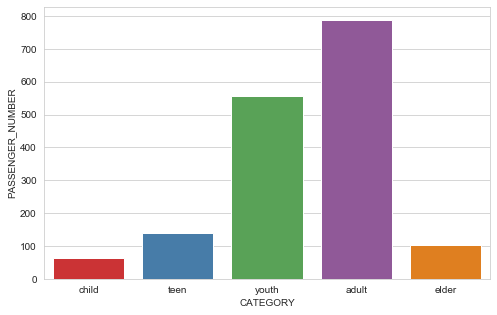

In [19]:
#To calcultate total number of  according to their age
titanic_child_passenger=titanic[titanic["Age"]<=10].count()
titanic_teen_passenger=titanic[ titanic["Age"]<=18].count()
titanic_youth_passenger=titanic[titanic["Age"]<=30].count()
titanic_adult_passenger=titanic[titanic["Age"]<=45].count()
titanic_elder_passenger=titanic[titanic["Age"]>45].count()
print("Total number of child passenger ",titanic_child_passenger["PassengerId"])
print("Total number of teen passenger ",titanic_teen_passenger["PassengerId"])
print("Total number of youth passenger ",titanic_youth_passenger["PassengerId"])
print("Total number of adult passenger ",titanic_adult_passenger["PassengerId"])
print("Total number of elder passenger ",titanic_elder_passenger["PassengerId"])
plt.figure(figsize=(8,5))
num1,num2,num3,num4,num5=titanic_child_passenger["PassengerId"],titanic_teen_passenger["PassengerId"],titanic_youth_passenger["PassengerId"],titanic_adult_passenger["PassengerId"],titanic_elder_passenger["PassengerId"]
passenger=pd.DataFrame({"PASSENGER_NUMBER" :[num1,num2,num3,num4,num5],"CATEGORY":["child","teen","youth","adult","elder"]},columns=["PASSENGER_NUMBER","CATEGORY"])
sns.barplot(x="CATEGORY",y="PASSENGER_NUMBER",data=passenger,palette="Set1")

This show that the maximum passenger were adult and then youth

Total number of child passenger survived 38
Total number of teen passenger survived 70
Total number of youth passenger survived 204
Total number of adult passenger survived 304
Total number of elder passenger survived 38


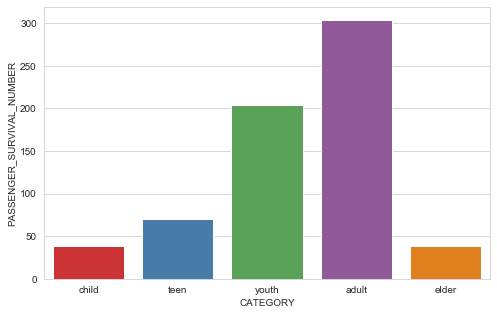

In [20]:
#To calcultate total number of passenger survival according to their age
titanic_child_survived=titanic[(titanic["Age"]<=10) & (titanic["Survived"]==1)].count()
titanic_teen_survived=titanic[( titanic["Age"]<=18) & (titanic["Survived"]==1)].count()
titanic_youth_survived=titanic[(titanic["Age"]<=30) & (titanic["Survived"]==1)].count()
titanic_adult_survived=titanic[(titanic["Age"]<=45) & (titanic["Survived"]==1)].count()
titanic_elder_survived=titanic[(titanic["Age"]>45) & (titanic["Survived"]==1)].count()
print("Total number of child passenger survived",titanic_child_survived["PassengerId"])
print("Total number of teen passenger survived",titanic_teen_survived["PassengerId"])
print("Total number of youth passenger survived",titanic_youth_survived["PassengerId"])
print("Total number of adult passenger survived",titanic_adult_survived["PassengerId"])
print("Total number of elder passenger survived",titanic_elder_survived["PassengerId"])
plt.figure(figsize=(8,5))
num1,num2,num3,num4,num5=titanic_child_survived["PassengerId"],titanic_teen_survived["PassengerId"],titanic_youth_survived["PassengerId"],titanic_adult_survived["PassengerId"],titanic_elder_survived["PassengerId"]
passenger=pd.DataFrame({"PASSENGER_SURVIVAL_NUMBER" :[num1,num2,num3,num4,num5],"CATEGORY":["child","teen","youth","adult","elder"]},columns=["PASSENGER_SURVIVAL_NUMBER","CATEGORY"])
sns.barplot(x="CATEGORY",y="PASSENGER_SURVIVAL_NUMBER",data=passenger,palette="Set1")

Hence, the above graph show that the number of maxium were survival were adult and child elder were of same number


In [21]:
#TO find the titleof the name
titanic["title"]=titanic["Name"].apply(lambda Name:Name.split(",")[1])
titanic["title"]=titanic["title"].apply(lambda Name:Name.split(".")[0])
titanic["title"].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [22]:
titanic["title"].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Major             2
 Mlle              2
 Don               1
 Capt              1
 Jonkheer          1
 Sir               1
 Lady              1
 Ms                1
 Mme               1
 the Countess      1
Name: title, dtype: int64

0    549
1    342
Name: Survived, dtype: int64


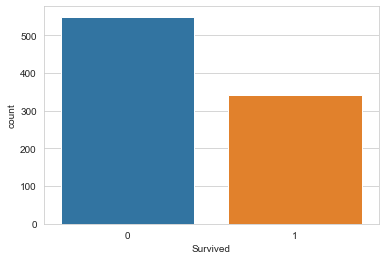

In [23]:
# To count the total number of passenger who survived
print(titanic["Survived"].value_counts())

#to visualize the data
sns.countplot("Survived",data=titanic)

The above graph show that the number of that did not survived are around 590 and those who survived are arounf 350

In [24]:
# To calculate the total fare collected from each Class
titanic_pclass=titanic.groupby("Pclass")
titanic_pclass["Fare"].sum()

Pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: Fare, dtype: float64

This show that maximum fare is being collected from first class people

In [25]:
# TO calculate the total number of passenger without any family members
titanic_alone=titanic[(titanic["SibSp"]==0) & (titanic["Parch"]==0)].count()
print("the total number of passenger without any family members",titanic_alone["PassengerId"])

the total number of passenger without any family members 537


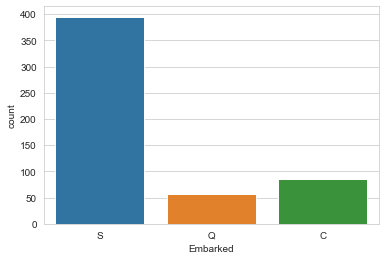

In [26]:
titanic_alone=titanic[(titanic["SibSp"]==0) & (titanic["Parch"]==0)]
print()
sns.countplot(x="Embarked",data=titanic_alone)

The above graph show that most of the passenger that travelled alone were from S

In [27]:
# TO find the passengers that travelled with their family
titanic_not_alone=titanic[(titanic["SibSp"]!=0) | (titanic["Parch"]!=0)].count()
#sns.countplot(x="Embarked",data=titanic_alone)
print("The number of passengers that travelled with the family are ",titanic_not_alone["PassengerId"])

The number of passengers that travelled with the family are  354


The from above data we get that passenger that travelled alone were 537 and that travelled with their family were 354 thus total on adding give 891 which show that our analysis about data is right cause in dataset there are total 891 passenger

The total number of passenger with one family member 161
The total number of passenger with two family member 102
The total number of passenger with three family member 29
The total number of passenger with four family member 15
The total number of passenger with five family member 22
The total number of passenger with six family member 12
The total number of passenger with seven family member  6
The total number of passenger with eight family member 0


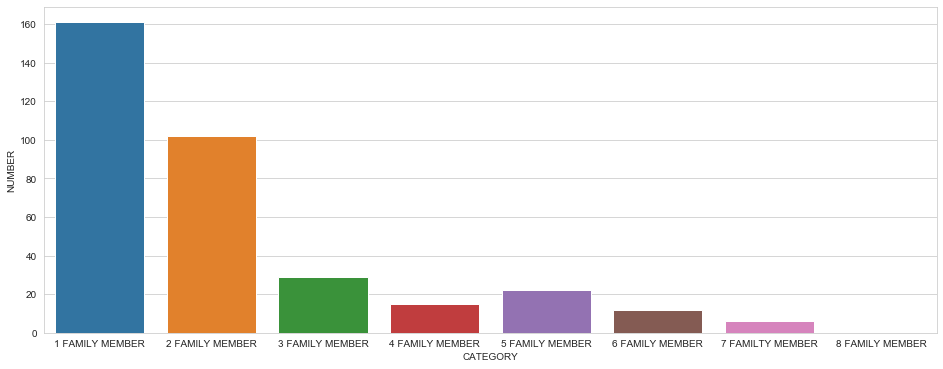

In [28]:
# TO calculate total passneger that travelled with 1 family member
titanic_pas_1=titanic[(titanic["SibSp"] +titanic["Parch"]==1)].count()
#TO calculate total passenger that travelled with 2 family member
titanic_pas_2=titanic[(titanic["SibSp"] +titanic["Parch"]==2)].count()
# TO calculate total passneger that travelled with 3 family member
titanic_pas_3=titanic[(titanic["SibSp"] +titanic["Parch"]==3)].count()
#TO calculate total passenger that travelled with 4 family member
titanic_pas_4=titanic[(titanic["SibSp"] +titanic["Parch"]==4)].count()
# TO calculate total passneger that travelled with 5 family member
titanic_pas_5=titanic[(titanic["SibSp"] +titanic["Parch"]==5)].count()
#TO calculate total passenger that travelled with 6 family member
titanic_pas_6=titanic[(titanic["SibSp"] +titanic["Parch"]==6)].count()
# TO calculate total passneger that travelled with 7 family member
titanic_pas_7=titanic[(titanic["SibSp"] +titanic["Parch"]==7)].count()
#TO calculate total passenger that travelled with 8 family member
titanic_pas_8=titanic[(titanic["SibSp"] +titanic["Parch"]==9)].count() 
print("The total number of passenger with one family member",titanic_pas_1["PassengerId"])
print("The total number of passenger with two family member",titanic_pas_2["PassengerId"])
print("The total number of passenger with three family member",titanic_pas_3["PassengerId"])
print("The total number of passenger with four family member",titanic_pas_4["PassengerId"])
print("The total number of passenger with five family member",titanic_pas_5["PassengerId"])
print("The total number of passenger with six family member",titanic_pas_6["PassengerId"])
print("The total number of passenger with seven family member ",titanic_pas_7["PassengerId"])
print("The total number of passenger with eight family member",titanic_pas_8["PassengerId"])
plt.figure(figsize=(16,6))
num1,num2,num3,num4,num5,num6,num7,num8=titanic_pas_1["PassengerId"],titanic_pas_2["PassengerId"],titanic_pas_3["PassengerId"],titanic_pas_4["PassengerId"],titanic_pas_5["PassengerId"],titanic_pas_6["PassengerId"],titanic_pas_7["PassengerId"],titanic_pas_8["PassengerId"]
passenger=pd.DataFrame({"NUMBER" :[num1,num2,num3,num4,num5,num6,num7,num8],"CATEGORY":["1 FAMILY MEMBER","2 FAMILY MEMBER","3 FAMILY MEMBER","4 FAMILY MEMBER","5 FAMILY MEMBER","6 FAMILY MEMBER","7 FAMILTY MEMBER","8 FAMILY MEMBER"]},columns=["NUMBER","CATEGORY"])
sns.barplot(x="CATEGORY",y="NUMBER",data=passenger)


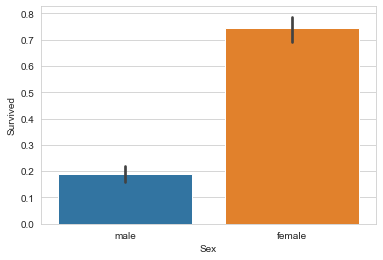

In [28]:
# TO show various sex survival in the titanic
sns.barplot(x="Sex",y="Survived",data=titanic)            

The above barplot show that the total number of survival were female

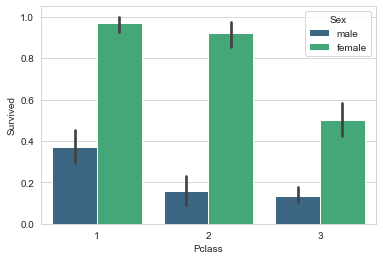

In [29]:
# To show various class survival in the titanic
sns.barplot(x="Pclass",y="Survived",hue="Sex",data=titanic,palette="viridis")

The above graph show the maxium number of survival are female from class1 and least from class 2

# Feature selection 

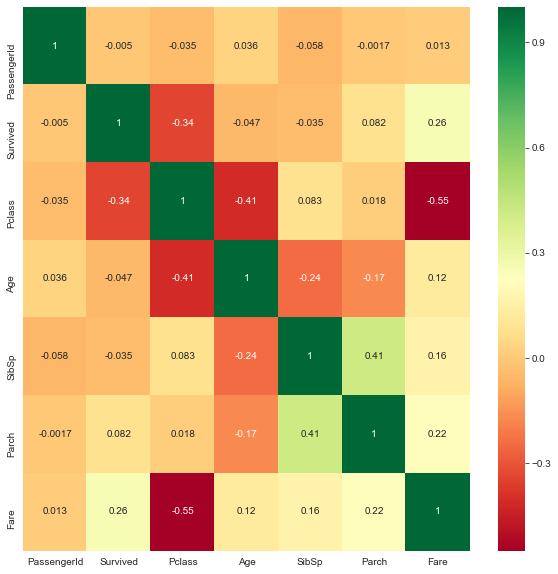

In [30]:

#get correlations of each features in dataset
corrmat = titanic.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(titanic[top_corr_features].corr(),annot=True,cmap="RdYlGn")


## Removing unwanted column

In [31]:
# remove the passenger id,cabin,ticket
titanic=titanic.drop(["PassengerId","Name","Cabin","Ticket"],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [32]:
# To add one more feature as family member
#titanic["family_members"]=titanic["SibSp"]+titanic["Parch"]+1

In [33]:
# to convert male to 0 and female to 1
def sex(cols):
    if cols=="male":
        return 0
    else:
        return 1
titanic["Sex"]=titanic["Sex"].apply(sex)    

In [34]:
# create the dummy variable for the Embarked
dummies=pd.get_dummies(titanic.Embarked)
merged=pd.concat([titanic,dummies],axis="columns")
titanic_new1=merged.drop(["Embarked","C"],axis=1)


In [35]:
#create the dummy variable for the titles
dummies=pd.get_dummies(titanic.title)
merged=pd.concat([titanic_new1,dummies],axis="columns")
titanic_new=merged.drop(["title"],axis=1)

In [36]:
#creating x and y
x=titanic_new.drop(["Survived"],axis=1)
y=titanic_new["Survived"]


# To select the best parameter for the model using GridSearchCV

## paramter for KNN

In [37]:
#import the module
from  sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [38]:
# define the parameter value that should be searched
k_range = range(1,31)
k_range

range(1, 31)

In [39]:
# create the parameter grid:map the paramter names to the values that should be rearched
param_grid=dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': range(1, 31)}


In [40]:
# instantive yhe grid
grid=GridSearchCV(knn,param_grid,cv=10,scoring="accuracy")

In [41]:
# fit the grid with data
grid.fit(x,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [42]:
#view the complete result 
grid.cv_results_

{'mean_fit_time': array([ 0.01064396,  0.0080399 ,  0.00828307,  0.00632458,  0.01087465,
         0.00871985,  0.00891588,  0.01044335,  0.0097111 ,  0.00752857,
         0.00861061,  0.00822685,  0.0090502 ,  0.00878928,  0.00921485,
         0.00928617,  0.00988157,  0.01020408,  0.00955164,  0.00774634,
         0.00977037,  0.00996912,  0.00851533,  0.00887599,  0.00771542,
         0.00872879,  0.01221263,  0.00860412,  0.0076124 ,  0.00801399]),
 'std_fit_time': array([ 0.00445554,  0.00307993,  0.00450859,  0.00121631,  0.00639613,
         0.00260549,  0.00404753,  0.00485015,  0.00347247,  0.00271774,
         0.00433714,  0.00340498,  0.00248411,  0.00465012,  0.00445546,
         0.00341444,  0.00441442,  0.00524916,  0.0029095 ,  0.00337658,
         0.00295746,  0.00398973,  0.00234359,  0.00246623,  0.00323694,
         0.00297914,  0.00519601,  0.00493066,  0.00273932,  0.00271028]),
 'mean_score_time': array([ 0.00553575,  0.00882776,  0.00627565,  0.00501266,  0.00485

In [43]:
#examine the best model`
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
n_neg=grid.best_params_

0.726150392817
{'n_neighbors': 3}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


 Hence we get the information that best score is when the n_neighbors is 3 therefore we gonna use 3 as parameter for KNN

## Paramter for decison tree

# To select the best model using Cross- validation

In [44]:
#import moduel
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [45]:
# 10 fold cross validation with best knn model
knn= KNeighborsClassifier(n_neighbors=)
print(cross_val_score(knn,x,y,cv=10,scoring="accuracy").mean())

0.726260923845


In [53]:
# 10 fold cross validation with logistic regression
logreg=LogisticRegression()
print (cross_val_score(logreg,x,y,cv=15,scoring="accuracy").mean())

0.827367361517


In [47]:
# 10 fold cross validation with random forest
from sklearn.tree import DecisionTreeClassifier
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring="accuracy").mean())

0.77899670866
